In [11]:
import numpy as np
import pandas as pd
import acquire
import prepare
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

Using the titanic data, in your classification-exercises repository, create a notebook, decision_tree.ipynb where you will do the following:
## 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [13]:
# Get my titanic dataset using my acquire function and run it through my prepare function to clean it

titanic = acquire.get_titanic_data()

titanic = prepare.prep_titantic(titanic)

titanic.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [16]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [17]:
titanic[titanic.survived == 0]

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline
0,0,3,male,1,0,7.2500,Southampton,0,1,0,1,0
4,0,3,male,0,0,8.0500,Southampton,1,1,0,1,0
5,0,3,male,0,0,8.4583,Queenstown,1,1,1,0,0
6,0,1,male,0,0,51.8625,Southampton,1,1,0,1,0
7,0,3,male,3,1,21.0750,Southampton,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,0,0,7.0500,Southampton,1,1,0,1,0
885,0,3,female,0,5,29.1250,Queenstown,0,0,1,0,0
886,0,2,male,0,0,13.0000,Southampton,1,1,0,1,0
888,0,3,female,1,2,23.4500,Southampton,0,0,0,1,0


In [18]:
titanic['baseline'] = titanic.survived.value_counts().idxmax()

titanic

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline
0,0,3,male,1,0,7.2500,Southampton,0,1,0,1,0
1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,0,0,1,0
3,1,1,female,1,0,53.1000,Southampton,0,0,0,1,0
4,0,3,male,0,0,8.0500,Southampton,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Southampton,1,1,0,1,0
887,1,1,female,0,0,30.0000,Southampton,1,0,0,1,0
888,0,3,female,1,2,23.4500,Southampton,0,0,0,1,0
889,1,1,male,0,0,30.0000,Cherbourg,1,1,0,0,0


In [25]:
# Made a baseline of my dataset and calculated my base_line accuracy

baseline_accuracy = (titanic.survived == titanic['baseline']).mean()


print(f'Our baseline prediction is {titanic.survived.value_counts().idxmax()}')
print(f'Our baseline accuracy is {baseline_accuracy:.2%}')

Our baseline prediction is 0
Our baseline accuracy is 61.62%


## 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [21]:
# split my data into train, validate, and test using my split function from my prepare notebook

col = 'survived'

train, validate, test = prepare.train_val_test(titanic, col)

train.shape, validate.shape, test.shape

((623, 12), (311, 12), (312, 12))

In [26]:
# split my data into x and y variables with my split dataset of train, validate, and test data

X_train = train.drop(columns=['survived', 'sex', 'embark_town'])
y_train = train[['survived']]

X_validate = validate.drop(columns=['survived', 'sex', 'embark_town'])
y_validate = validate['survived']

X_test = test.drop(columns=['survived', 'sex', 'embark_town'])
y_test = test['survived']

In [27]:
# made my decision tree classifier
seed = 42

clf = DecisionTreeClassifier(max_depth=3, random_state=42)

clf

DecisionTreeClassifier(max_depth=3, random_state=42)

In [31]:
# fitted the 1st decision tree model

clf = clf.fit(X_train, y_train)

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 748 to 136
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pclass                   623 non-null    int64  
 1   sibsp                    623 non-null    int64  
 2   parch                    623 non-null    int64  
 3   fare                     623 non-null    float64
 4   alone                    623 non-null    int64  
 5   sex_male                 623 non-null    uint8  
 6   embark_town_Queenstown   623 non-null    uint8  
 7   embark_town_Southampton  623 non-null    uint8  
 8   baseline                 623 non-null    int64  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 35.9 KB


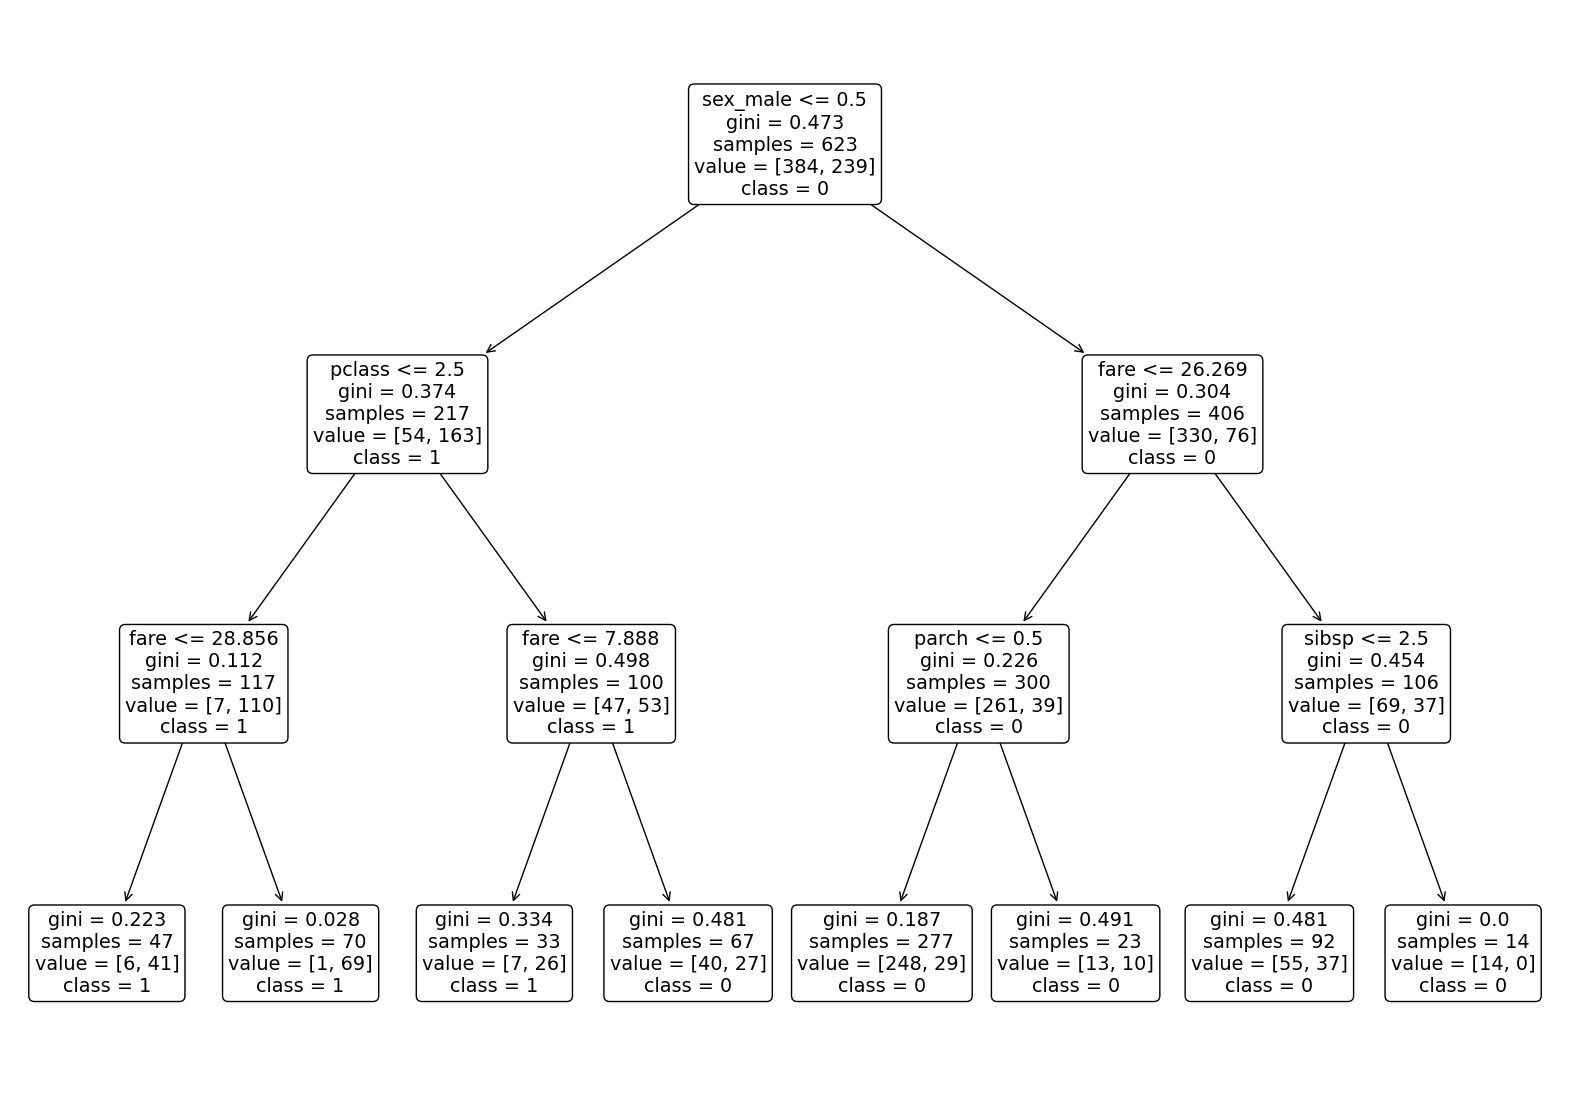

In [30]:
plt.figure(figsize=(20, 14))
plot_tree(clf, feature_names=X_train.columns, 
          class_names = np.array(clf.classes_).astype('str').tolist(), 
          rounded=True)
plt.show()

## 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [74]:
y_preds = clf.predict(X_train)

In [75]:
clf.score(X_train,y_train)

0.8956661316211878

In [76]:
confusion_matrix(y_train, y_preds)

array([[371,  13],
       [ 52, 187]])

In [43]:
print(classification_report(y_train, test_preds))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       384
           1       0.91      0.57      0.70       239

    accuracy                           0.81       623
   macro avg       0.84      0.77      0.78       623
weighted avg       0.83      0.81      0.80       623



In [51]:
(y_train == 0).mean()

survived    0.616372
dtype: float64

## 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [57]:
tn, fp, fn, tp = confusion_matrix(y_train,y_preds).ravel()
acc_all = tn + tp + fn + fp

tn, fp, fn, tp, acc_all

(370, 14, 103, 136, 623)

In [58]:
accuracy = (tp + tn)/acc_all
print(f"Accuracy: {accuracy:.3}")

true_positive_rate = tp/(tp+fn)
print(f"True Positive Rate: {true_positive_rate:.3}")

false_positive_rate = fp/(fp+tn)
print(f"False Positive Rate: {false_positive_rate:.3}")

true_negative_rate = tn/(tn+fp)
print(f"True Negative Rate: {true_negative_rate:.3}")

false_negative_rate = fn/(fn+tp)
print(f"False Negative Rate: {false_negative_rate:.3}")

precision = tp/(tp+fp)
print(f"Precision: {precision:.3}")

recall = tp/(tp+fn)
print(f"Recall: {recall:.3}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score:.3}")

support_pos = tp + fn
print(f"Support (0): {support_pos}")

support_neg = fp + tn
print(f"Support (1): {support_neg}")

Accuracy: 0.812
True Positive Rate: 0.569
False Positive Rate: 0.0365
True Negative Rate: 0.964
False Negative Rate: 0.431
Precision: 0.907
Recall: 0.569
F1 Score: 0.699
Support (0): 239
Support (1): 384


## 5. Run through steps 2-4 using a different max_depth value.

In [61]:
model_prediction = y_train.copy()

for i in range(4, 11):
        clf = DecisionTreeClassifier(max_depth = i, random_state = 42)
           
        clf.fit(X_train, y_train)
        
        y_preds = clf.predict(X_train)
        
        # report = classification_report(y_train, y_preds, output_dict = True)
        # print(f"Tree with max depth {i})
        # print(pd.DataFrame(report))
        # print()
        model_prediction[f'max_depth{i}'] = y_preds

In [60]:
model_prediction

,survived,max_depth4,max_depth5,max_depth6,max_depth7,max_depth8,max_depth9,max_depth10
748,0,0,0,0,0,0,0,0
45,0,0,0,0,0,0,0,0
28,1,1,1,1,1,1,1,1
633,0,0,0,0,0,0,0,0
403,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
476,0,0,0,0,0,0,0,0
190,1,1,1,1,1,1,1,1
736,0,0,0,0,0,0,0,0
462,0,0,0,0,0,0,0,0


## 6. Which model performs better on your in-sample data?

In [150]:
actuals = model_prediction.survived
predictions = model_prediction.drop(columns = 'survived')

for col in predictions.columns:
    
    accuracy = (actuals == predictions[col]).mean()
    
    print(f'{col} accuracy: {accuracy:.2%}')

max_depth4 accuracy: 82.50%
max_depth5 accuracy: 83.47%
max_depth6 accuracy: 85.07%
max_depth7 accuracy: 87.16%
max_depth8 accuracy: 87.16%
max_depth9 accuracy: 88.92%
max_depth10 accuracy: 89.57%


## 7. Which model performs best on your out-of-sample data, the validate set

In [64]:
metrics =[]

for i in range(1,25):
    tree = DecisionTreeClassifier(max_depth= i, random_state = 123)
    tree = tree.fit(X_train, y_train)
    in_sample_accuracy = tree.score(X_train, y_train)
    out_of_sample_accuracy = tree.score(X_validate, y_validate)
    
    output = {'max_depth': i, 'train_accuracy': in_sample_accuracy, 'validate_accuracy': out_of_sample_accuracy}
    
    metrics.append(output)
    
df= pd.DataFrame(metrics)
df['difference'] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.791332,0.790997,0.000335
1,2,0.791332,0.790997,0.000335
2,3,0.812199,0.797428,0.014771
3,4,0.825040,0.813505,0.011535
4,5,0.834671,0.829582,0.005089
5,6,0.850722,0.842444,0.008279
6,7,0.871589,0.874598,-0.003009
7,8,0.871589,0.874598,-0.003009
8,9,0.889246,0.890675,-0.001430
9,10,0.895666,0.903537,-0.007871


In [71]:
plt.figure(figsize=(10,6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label = 'Train' )
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label = 'Validate' )
plt.legend()
plt.show()

TypeError: 'tuple' object is not callable

In [205]:
model_prediction = y_train.copy()

for i in range(2, 11):
        seed = 42
        
        clf = DecisionTreeClassifier(max_depth = i, random_state = 42)
           
        clf = clf.fit(X_validate, y_validate)
        
        current_preds = clf.predict(X_train)
        
        model_prediction[f'max_depth{i}'] = current_preds

In [206]:
model_prediction

,survived,max_depth2,max_depth3,max_depth4,max_depth5,max_depth6,max_depth7,max_depth8,max_depth9,max_depth10
748,0,0,0,0,0,0,0,1,1,1
45,0,0,0,0,0,0,0,0,0,0
28,1,0,1,0,1,1,1,1,1,1
633,0,0,0,0,0,0,0,0,0,0
403,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
476,0,0,0,0,0,0,0,0,0,0
190,1,1,1,1,1,1,1,1,1,1
736,0,0,0,0,0,0,0,0,0,0
462,0,0,0,0,0,0,0,1,1,1


In [207]:
actuals = model_prediction.survived
predictions = model_prediction.drop(columns = 'survived')

for col in predictions.columns:
    
    accuracy = (actuals == predictions[col]).mean()
    
    print(f'{col} accuracy: {accuracy:.2%}')
    
# Model max_depth 3 is the best model with out of sample data    

max_depth2 accuracy: 78.17%
max_depth3 accuracy: 80.42%
max_depth4 accuracy: 77.05%
max_depth5 accuracy: 78.81%
max_depth6 accuracy: 78.17%
max_depth7 accuracy: 77.85%
max_depth8 accuracy: 76.40%
max_depth9 accuracy: 75.44%
max_depth10 accuracy: 75.44%


                     --------------------------------------------------

## 1. Work through these same exercises using the Telco dataset.

In [241]:
telco = acquire.get_telco_data()

telco = prepare.prep_telco(telco)

telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1


In [242]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            7043 non-null   object 
 1   gender                                 7043 non-null   object 
 2   senior_citizen                         7043 non-null   int64  
 3   partner                                7043 non-null   object 
 4   dependents                             7043 non-null   object 
 5   tenure                                 7043 non-null   int64  
 6   phone_service                          7043 non-null   object 
 7   multiple_lines                         7043 non-null   object 
 8   online_security                        7043 non-null   object 
 9   online_backup                          7043 non-null   object 
 10  device_protection                      7043 non-null   object 
 11  tech

In [243]:
telco['baseline'] = telco.churn_encoded.value_counts().idxmax()

telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,baseline
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0


In [244]:
baseline_accuracy = (telco.churn_encoded == telco.baseline).mean()


print(f'Our baseline prediction is {telco.baseline.value_counts().idxmax()}')
print(f'Our baseline accuracy is {baseline_accuracy:.2%}')

Our baseline prediction is 0
Our baseline accuracy is 73.46%


In [245]:
col = 'churn_encoded'

train, validate, test = prepare.train_val_test(telco, col)

train.shape, validate.shape, test.shape

((4930, 49), (1056, 49), (1057, 49))

In [246]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 5609 to 5679
Data columns (total 49 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            4930 non-null   object 
 1   gender                                 4930 non-null   object 
 2   senior_citizen                         4930 non-null   int64  
 3   partner                                4930 non-null   object 
 4   dependents                             4930 non-null   object 
 5   tenure                                 4930 non-null   int64  
 6   phone_service                          4930 non-null   object 
 7   multiple_lines                         4930 non-null   object 
 8   online_security                        4930 non-null   object 
 9   online_backup                          4930 non-null   object 
 10  device_protection                      4930 non-null   object 
 11  t

In [247]:
cat_var = train.select_dtypes(include = ['object'])

cat_var

,customer_id,gender,partner,dependents,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,total_charges,churn,contract_type,internet_service_type,payment_type
5609,7901-HXJVA,Male,No,No,Yes,No,No,No,Yes,No,No,No,No,1117.55,No,Month-to-month,Fiber optic,Electronic check
2209,3164-AALRN,Male,No,No,Yes,No,No,No,Yes,No,Yes,Yes,Yes,347.4,Yes,One year,DSL,Mailed check
6919,9821-POOTN,Male,Yes,No,Yes,Yes,No,No,No,No,No,No,Yes,2576.2,Yes,Month-to-month,Fiber optic,Electronic check
2284,3259-QMXUN,Male,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,4890.5,No,Two year,DSL,Electronic check
845,1226-UDFZR,Female,No,No,Yes,No,No,Yes,No,No,No,No,Yes,114.7,Yes,Month-to-month,DSL,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,6080-TCMYC,Male,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,3292.3,No,Month-to-month,Fiber optic,Electronic check
1501,2207-RYYRL,Male,Yes,Yes,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,1331.05,No,Two year,None,Mailed check
6331,8966-OIQHG,Female,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,452.35,No,One year,None,Bank transfer (automatic)
2739,3896-ZVNET,Female,Yes,Yes,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,571.75,No,Two year,None,Mailed check


In [248]:
train = train.drop(columns = cat_var)

In [249]:
validate = validate.drop(columns = cat_var)
test = test.drop(columns = cat_var)

In [250]:
pd.set_option('display.max_columns', None)
train

,senior_citizen,tenure,monthly_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,baseline
5609,0,14,76.45,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2209,0,5,70.00,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0
6919,0,35,75.20,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2284,0,58,86.10,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0
845,0,2,49.60,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,0,40,81.20,0,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1501,0,52,24.55,0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0
6331,0,22,20.75,1,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0
2739,0,24,24.70,1,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0


In [251]:
X_train = train.drop(columns=['churn_encoded', 'tenure', 'monthly_charges'])
y_train = train[['churn_encoded']]

X_validate = validate.drop(columns=['churn_encoded', 'tenure', 'monthly_charges'])
y_validate = validate['churn_encoded']

X_test = test.drop(columns=['churn_encoded', 'tenure', 'monthly_charges'])
y_test = test['churn_encoded']

In [277]:
seed = 42

clf = DecisionTreeClassifier(max_depth=3, random_state=42)

clf

DecisionTreeClassifier(max_depth=3, random_state=42)

In [278]:
clf = clf.fit(X_train, y_train)

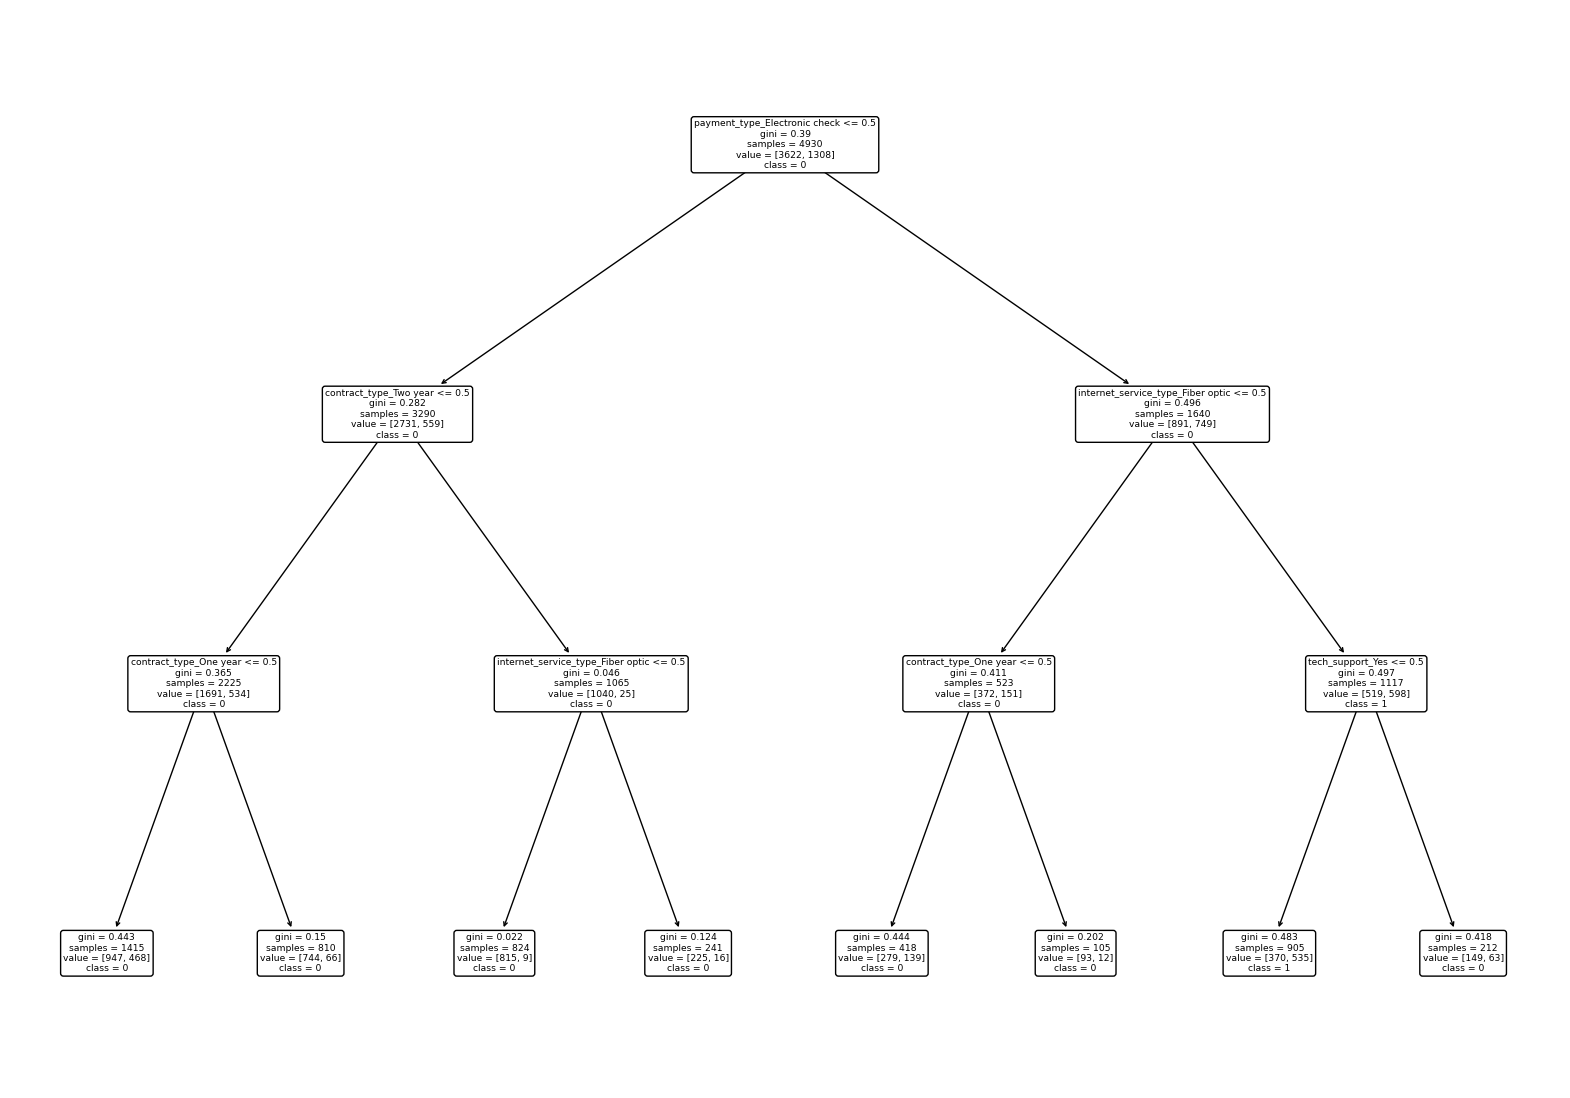

In [279]:
plt.figure(figsize=(20, 14))
plot_tree(clf, feature_names=X_train.columns, 
          class_names = np.array(clf.classes_).astype('str').tolist(), 
          rounded=True)
plt.show()

In [280]:
clf.score(X_train,y_train)

0.7681541582150101

In [281]:
val_preds = clf.predict(X_validate)

In [282]:
confusion_matrix(y_validate, val_preds)

array([[700,  76],
       [173, 107]])

In [283]:
print(classification_report(y_validate, val_preds))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       776
           1       0.58      0.38      0.46       280

    accuracy                           0.76      1056
   macro avg       0.69      0.64      0.66      1056
weighted avg       0.74      0.76      0.75      1056



In [284]:
tn, fp, fn, tp = confusion_matrix(y_validate,val_preds).ravel()
acc_all = tn + tp + fn + fp

tp, tn, fp, fn, acc_all

(107, 700, 76, 173, 1056)

In [285]:
accuracy = (tp + tn)/acc_all
print(f"Accuracy: {accuracy:.3}")

true_positive_rate = tp/(tp+fn)
print(f"True Positive Rate: {true_positive_rate:.3}")

false_positive_rate = fp/(fp+tn)
print(f"False Positive Rate: {false_positive_rate:.3}")

true_negative_rate = tn/(tn+fp)
print(f"True Negative Rate: {true_negative_rate:.3}")

false_negative_rate = fn/(fn+tp)
print(f"False Negative Rate: {false_negative_rate:.3}")

precision = tp/(tp+fp)
print(f"Precision: {precision:.3}")

recall = tp/(tp+fn)
print(f"Recall: {recall:.3}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score:.3}")

support_pos = tp + fn
print(f"Support (0): {support_pos}")

support_neg = fp + tn
print(f"Support (1): {support_neg}")

Accuracy: 0.764
True Positive Rate: 0.382
False Positive Rate: 0.0979
True Negative Rate: 0.902
False Negative Rate: 0.618
Precision: 0.585
Recall: 0.382
F1 Score: 0.462
Support (0): 280
Support (1): 776


In [286]:
model_prediction = y_train.copy()

for i in range(4, 11):
        clf = DecisionTreeClassifier(max_depth = i, random_state = 42)
           
        clf.fit(X_train, y_train)
        
        current_preds = clf.predict(X_train)
        
        model_prediction[f'max_depth{i}'] = current_preds

In [287]:
model_prediction

,churn_encoded,max_depth4,max_depth5,max_depth6,max_depth7,max_depth8,max_depth9,max_depth10
5609,0,1,1,1,1,1,1,0
2209,1,0,0,0,0,0,0,0
6919,1,1,1,1,1,1,1,1
2284,0,0,0,0,0,0,0,0
845,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
4312,0,1,1,1,1,1,1,1
1501,0,0,0,0,0,0,0,0
6331,0,0,0,0,0,0,0,0
2739,0,0,0,0,0,0,0,0


In [289]:
actuals = model_prediction.churn_encoded
predictions = model_prediction.drop(columns = 'churn_encoded')

for col in predictions.columns:
    
    accuracy = (actuals == predictions[col]).mean()
    
    print(f'{col} accuracy: {accuracy:.2%}')

max_depth4 accuracy: 77.77%
max_depth5 accuracy: 78.22%
max_depth6 accuracy: 78.68%
max_depth7 accuracy: 79.57%
max_depth8 accuracy: 80.59%
max_depth9 accuracy: 81.81%
max_depth10 accuracy: 83.75%


In [290]:
model_prediction = y_train.copy()

for i in range(2, 11):
        seed = 42
        
        clf = DecisionTreeClassifier(max_depth = i, random_state = 42)
           
        clf = clf.fit(X_validate, y_validate)
        
        current_preds = clf.predict(X_train)
        
        model_prediction[f'max_depth{i}'] = current_preds

In [291]:
model_prediction

,churn_encoded,max_depth2,max_depth3,max_depth4,max_depth5,max_depth6,max_depth7,max_depth8,max_depth9,max_depth10
5609,0,0,1,1,0,0,0,0,1,0
2209,1,0,0,0,0,0,0,0,0,0
6919,1,0,1,1,1,1,1,1,1,1
2284,0,0,0,0,0,0,0,0,0,0
845,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4312,0,0,1,1,0,1,1,0,0,0
1501,0,0,0,0,0,0,0,0,0,0
6331,0,0,0,0,0,0,0,0,0,0
2739,0,0,0,0,0,0,0,0,0,0


In [293]:
actuals = model_prediction.churn_encoded
predictions = model_prediction.drop(columns = 'churn_encoded')

for col in predictions.columns:
    
    accuracy = (actuals == predictions[col]).mean()
    
    print(f'{col} accuracy: {accuracy:.2%}')
    
# Model max_depth 4 is the best model with out of sample data    

max_depth2 accuracy: 73.47%
max_depth3 accuracy: 76.25%
max_depth4 accuracy: 77.24%
max_depth5 accuracy: 76.77%
max_depth6 accuracy: 75.94%
max_depth7 accuracy: 76.00%
max_depth8 accuracy: 74.75%
max_depth9 accuracy: 73.73%
max_depth10 accuracy: 72.05%


In [297]:
X_train.columns.to_list()

['senior_citizen',
 'gender_encoded',
 'partner_encoded',
 'dependents_encoded',
 'phone_service_encoded',
 'paperless_billing_encoded',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No internet service',
 'online_backup_Yes',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 'streaming_movies_No internet service',
 'streaming_movies_Yes',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check',
 'baseline']

In [298]:
X_train.columns.str.contains('payment')

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False])

In [81]:
X_train[X_train.columns.str.contains('payment')]

ValueError: Item wrong length 9 instead of 623.